# Crime in India

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read Data
data = pd.read_excel('Crimes in india.xlsx')

In [3]:
# Define DataFrame
df = pd.DataFrame(data=data)

In [4]:
df.columns

Index(['State ', 'Districts', 'District Population', 'State Population',
       'Dist Area', 'State Area', 'Density', 'Sex ratio',
       'Literacy rate State', 'Crime rate 2018', 'Crime rate 2019',
       'Crime rate 2020', 'Crime rate 2021', 'Overall Crime rate',
       'Total Crime ', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE', 'OTHER RAPE',
       'Kidnapping', 'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT',
       'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
       'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', ' IPC CRIMES'],
      dtype='object')

In [5]:
# Define the features you want to use for clustering
df2 = df[['State ', 'Districts', 'District Population', 'State Population',
       'Dist Area', 'State Area', 'Density', 'Sex ratio',
       'Literacy rate State', 'Crime rate 2018', 'Crime rate 2019',
       'Crime rate 2020', 'Crime rate 2021', 'Overall Crime rate',
       'Total Crime ', 'MURDER', 'ATTEMPT TO MURDER', 'RAPE', 'OTHER RAPE',
       'Kidnapping', 'DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT', 'AUTO THEFT',
       'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST', 'CHEATING',
       'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
       'CRUELTY BY HUSBAND OR HIS RELATIVES', ' IPC CRIMES']]

 # Cluster
 A cluster is a group of data points that are similar to each other based on their relation to surrounding data points. Clustering is used for things like feature engineering or pattern discovery

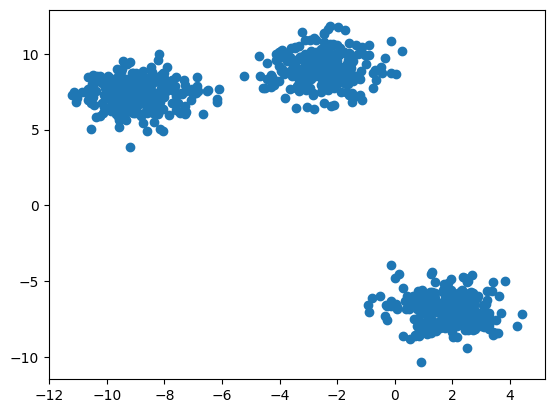

In [6]:
# Lets see the input feature Clusters
x,y = make_blobs(n_samples=len(df2),centers=3 , n_features=3,random_state=42)
plt.scatter(x[:,0],x[:,1],)

# Label Encoder
**Label encoding is a technique used to convert categorical data into numerical format. In many machine learning algorithms, it's necessary to convert categorical variables into numerical values since most algorithms work with numerical data. Label encoding assigns a unique integer to each category in the categorical variable.**

### Here's how label encoding works:

- Identify Categorical Variables: First, you identify the categorical variables in your dataset. These are variables that represent categories or groups, such as "red," "green," "blue" for colors, or "cat," "dog," "rabbit" for animal types.

- Apply Label Encoding: Once you identify categorical variables, you apply label encoding to convert them into numerical format. Each unique category is assigned a unique integer.

- Use Label Encoded Data: After label encoding, the categorical variables are transformed into numerical format, which can be used as input for machine learning algorithms.

In [7]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [8]:
# Encode 'State' feature
df2['State_encoded'] = label_encoder.fit_transform(df2['State '])

In [9]:
# Encode 'Districts' feature
df2['Districts_encoded'] = label_encoder.fit_transform(df2['Districts'])

In [10]:
# Drop original categorical features
df2.drop(['State ', 'Districts'], axis=1, inplace=True)

In [11]:
df2.head()

,District Population,State Population,Dist Area,State Area,Density,Sex ratio,Literacy rate State,Crime rate 2018,Crime rate 2019,Crime rate 2020,...,CRIMINAL BREACH OF TRUST,CHEATING,COUNTERFIETING,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,CRUELTY BY HUSBAND OR HIS RELATIVES,IPC CRIMES,State_encoded,Districts_encoded
0,954000.0,53156000,12251,162975,77.870,993,132.9,278.1,278.6,452.7,...,25,216,3,35,2172,7,498,1079,1,12
1,1727000.0,53156000,4292,162975,402.380,993,132.9,278.1,278.6,452.7,...,12,168,3,24,2018,19,130,1043,1,22
2,2241100.0,53156000,10205,162975,219.608,993,132.9,278.1,278.6,452.7,...,9,217,4,27,622,33,339,1398,1,24
3,1697300.0,53156000,7954,162975,213.389,993,132.9,278.1,278.6,452.7,...,76,332,1,6,2355,13,120,1360,1,28
4,1587000.0,53156000,3829,162975,414.470,993,132.9,278.1,278.6,452.7,...,168,1762,8,48,4013,45,976,3155,1,64


In [12]:
# Define features for clustering
features = ['Total Crime ', 'State_encoded', 'Districts_encoded']
X = df2[features]


# Standardization techniques:
**Standardization techniques are used in data preprocessing to transform features to have a mean of 0 and a standard deviation of 1. This process is also known as z-score normalization or z-score standardization. Standardization is particularly important in machine learning algorithms that rely on distance calculations, such as k-means clustering, support vector machines (SVM), and principal component analysis (PCA).**

In [13]:
# Perform scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled.shape

(787, 3)

## K-means clustering algorithm
- K-means clustering is the most commonly used clustering algorithm. It's a centroid-based algorithm and the simplest unsupervised learning algorithm.

- This algorithm tries to minimize the variance of data points within a cluster. It's also how most people are introduced to unsupervised machine learning.

- K-means is best used on smaller data sets because it iterates over all of the data points. That means it'll take more time to classify data points if there are a large amount of them in the data set.

- Since this is how k-means clusters data points, it doesn't scale well.

In [15]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_labels = kmeans.fit_predict(X_scaled)

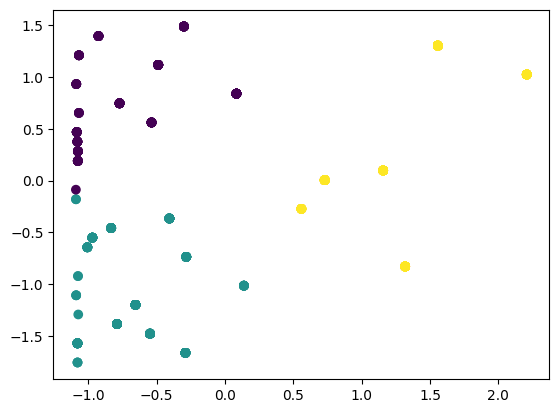

In [16]:
# lets see the Clusters predicted one
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y_labels)

In [17]:
# Add cluster labels to the DataFrame
df2['Cluster'] = y_labels

In [18]:
# Define cluster names based on labels
cluster_names = {
    0: "Sensitive Area's",
    1: "Moderate Area's",
    2: "Peaceful Area's"
}

In [19]:
# Map cluster labels to cluster names
df2['Cluster'] = df2['Cluster'].map(cluster_names)

In [20]:
# Create separate DataFrames for each cluster
cluster_sensitive = df2[df2['Cluster'] == "Sensitive Area's"].copy()
cluster_moderate = df2[df2['Cluster'] == "Moderate Area's"].copy()
cluster_peaceful = df2[df2['Cluster'] == "Peaceful Area's"].copy()

In [21]:
# Define a function to generate cluster reports
def generate_cluster_report(cluster_df, cluster_name):
    print(f"Cluster: {cluster_name}")
    print(cluster_df.describe())
    print("\n")

In [22]:
# Generate reports for each cluster
generate_cluster_report(cluster_sensitive, "Sensitive Area's")
generate_cluster_report(cluster_moderate, "Moderate Area's")
generate_cluster_report(cluster_peaceful, "Peaceful Area's")

Cluster: Sensitive Area's
       District Population  State Population     State Area       Density  \
count         2.330000e+02      2.460000e+02     246.000000    229.000000   
mean          1.303241e+06      4.072589e+07  124623.142276    618.124061   
std           1.457095e+06      3.393836e+07  119248.217147   2053.583865   
min           2.846800e+04      6.900000e+04      32.000000     10.000000   
25%           3.128570e+05      3.349000e+06   22352.500000    136.000000   
50%           8.696960e+05      3.809000e+07   90000.000000    259.000000   
75%           1.654408e+06      8.102500e+07  155707.000000    486.000000   
max           1.008285e+07      9.908400e+07  342239.000000  24252.000000   

         Sex ratio  Literacy rate State  Crime rate 2018  Crime rate 2019  \
count   246.000000           246.000000       246.000000       246.000000   
mean    954.808943           155.991260       238.310569       255.187805   
std      33.548747            12.998644        87

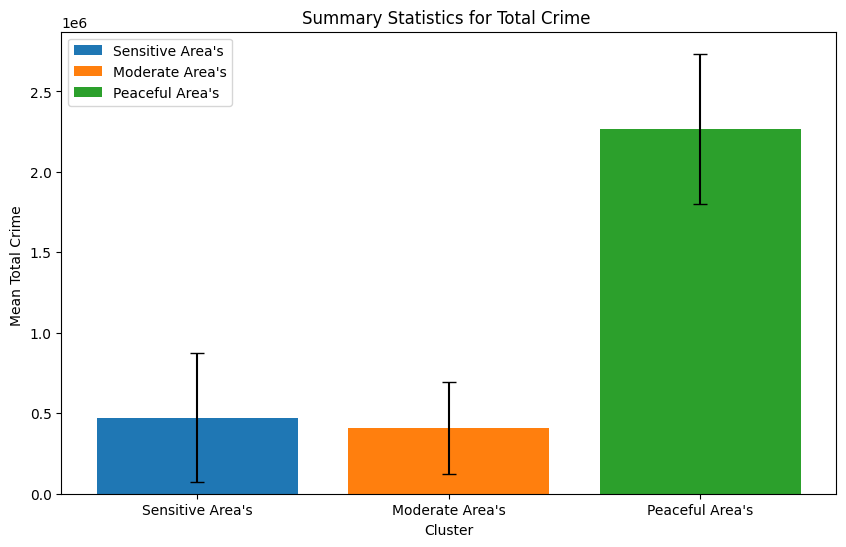

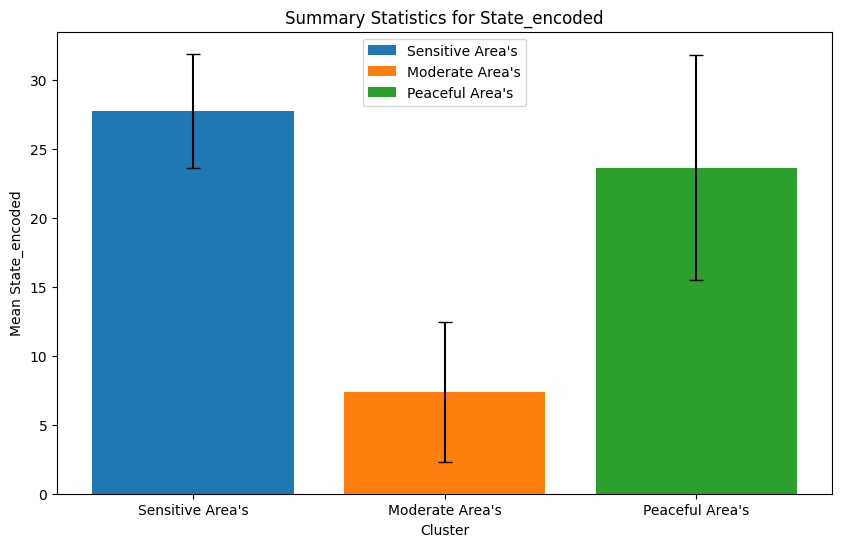

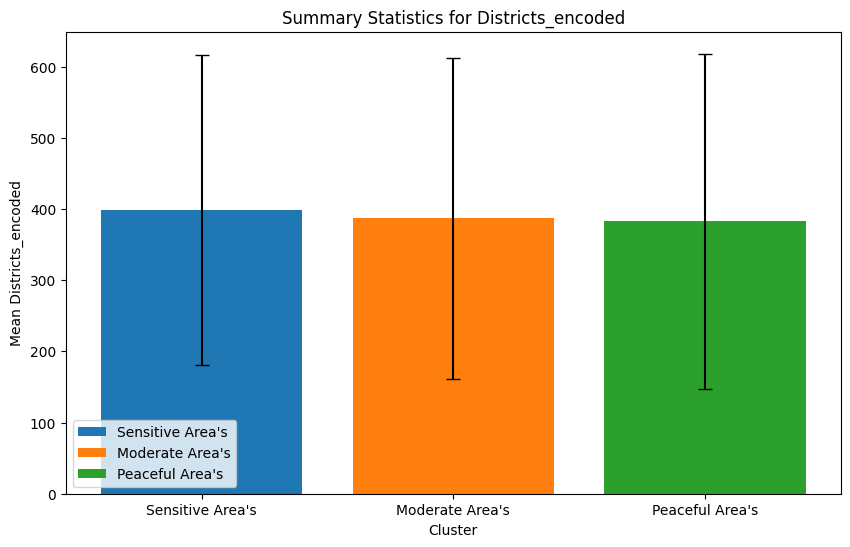

In [23]:
import matplotlib.pyplot as plt

# Define the statistical summaries for each cluster
cluster_names = ["Sensitive Area's", "Moderate Area's", "Peaceful Area's"]
clusters = [cluster_sensitive, cluster_moderate, cluster_peaceful]

# Define the features to visualize
features = ['Total Crime ', 'State_encoded', 'Districts_encoded']

# Plotting statistical summaries for each feature
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.title(f'Summary Statistics for {feature}')
    for cluster, cluster_name in zip(clusters, cluster_names):
        plt.bar(cluster_name, cluster[feature].mean(), yerr=cluster[feature].std(), capsize=5, label=cluster_name)
    plt.xlabel('Cluster')
    plt.ylabel('Mean ' + feature)
    plt.legend()
    plt.show()


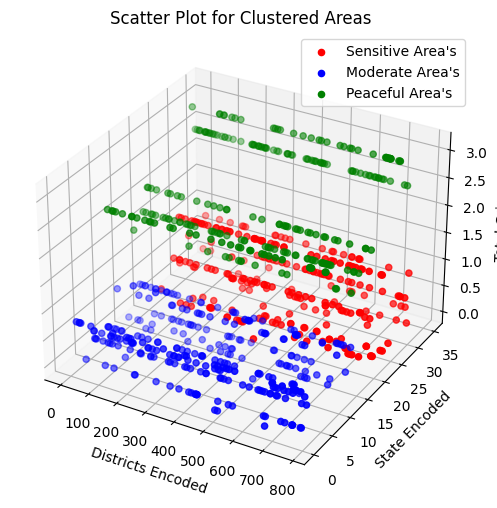

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each cluster
colors = {'Sensitive Area\'s': 'red', 'Moderate Area\'s': 'blue', 'Peaceful Area\'s': 'green'}

# Scatter plot for each cluster
for cluster, cluster_name in zip([cluster_sensitive, cluster_moderate, cluster_peaceful], ["Sensitive Area's", "Moderate Area's", "Peaceful Area's"]):
    ax.scatter(cluster['Districts_encoded'], cluster['State_encoded'], cluster['Total Crime '], label=cluster_name, c=colors[cluster_name])

# Set labels and title
ax.set_xlabel('Districts Encoded')
ax.set_ylabel('State Encoded')
ax.set_zlabel('Total Crime')
plt.title('Scatter Plot for Clustered Areas')

# Show legend
ax.legend()

# Show plot
plt.show()

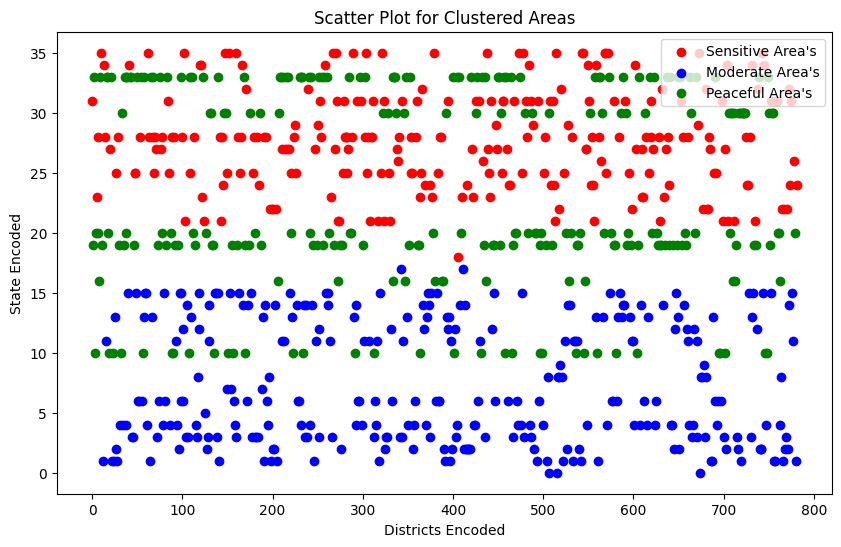

In [25]:
import matplotlib.pyplot as plt

# Create a new figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Define colors for each cluster
colors = {'Sensitive Area\'s': 'red', 'Moderate Area\'s': 'blue', 'Peaceful Area\'s': 'green'}

# Scatter plot for each cluster
for cluster, cluster_name in zip([cluster_sensitive, cluster_moderate, cluster_peaceful], ["Sensitive Area's", "Moderate Area's", "Peaceful Area's"]):
    ax.scatter(cluster['Districts_encoded'], cluster['State_encoded'], label=cluster_name, c=colors[cluster_name])

# Set labels and title
ax.set_xlabel('Districts Encoded')
ax.set_ylabel('State Encoded')
plt.title('Scatter Plot for Clustered Areas')

# Show legend
ax.legend()

# Show plot
plt.show()


In [26]:
# Checking WCSS Score
from sklearn.cluster import KMeans
wcss=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k, init='k-means++')
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

In [27]:
wcss

[1595.3690507577453,
 1163.6627086037156,
 927.9249652102501,
 711.8833010692103,
 567.6718095833978,
 475.0772663435421,
 403.24737804306346,
 358.4874330004234,
 329.58249721767345]

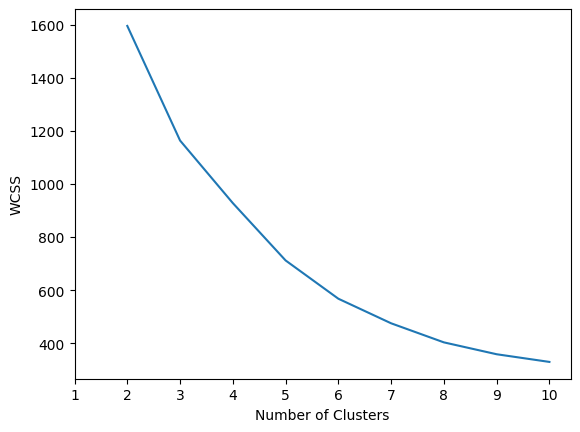

In [28]:
# Plot the elbow curve of WCSS Score
plt.plot(range(2,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel('WCSS')
plt.show()

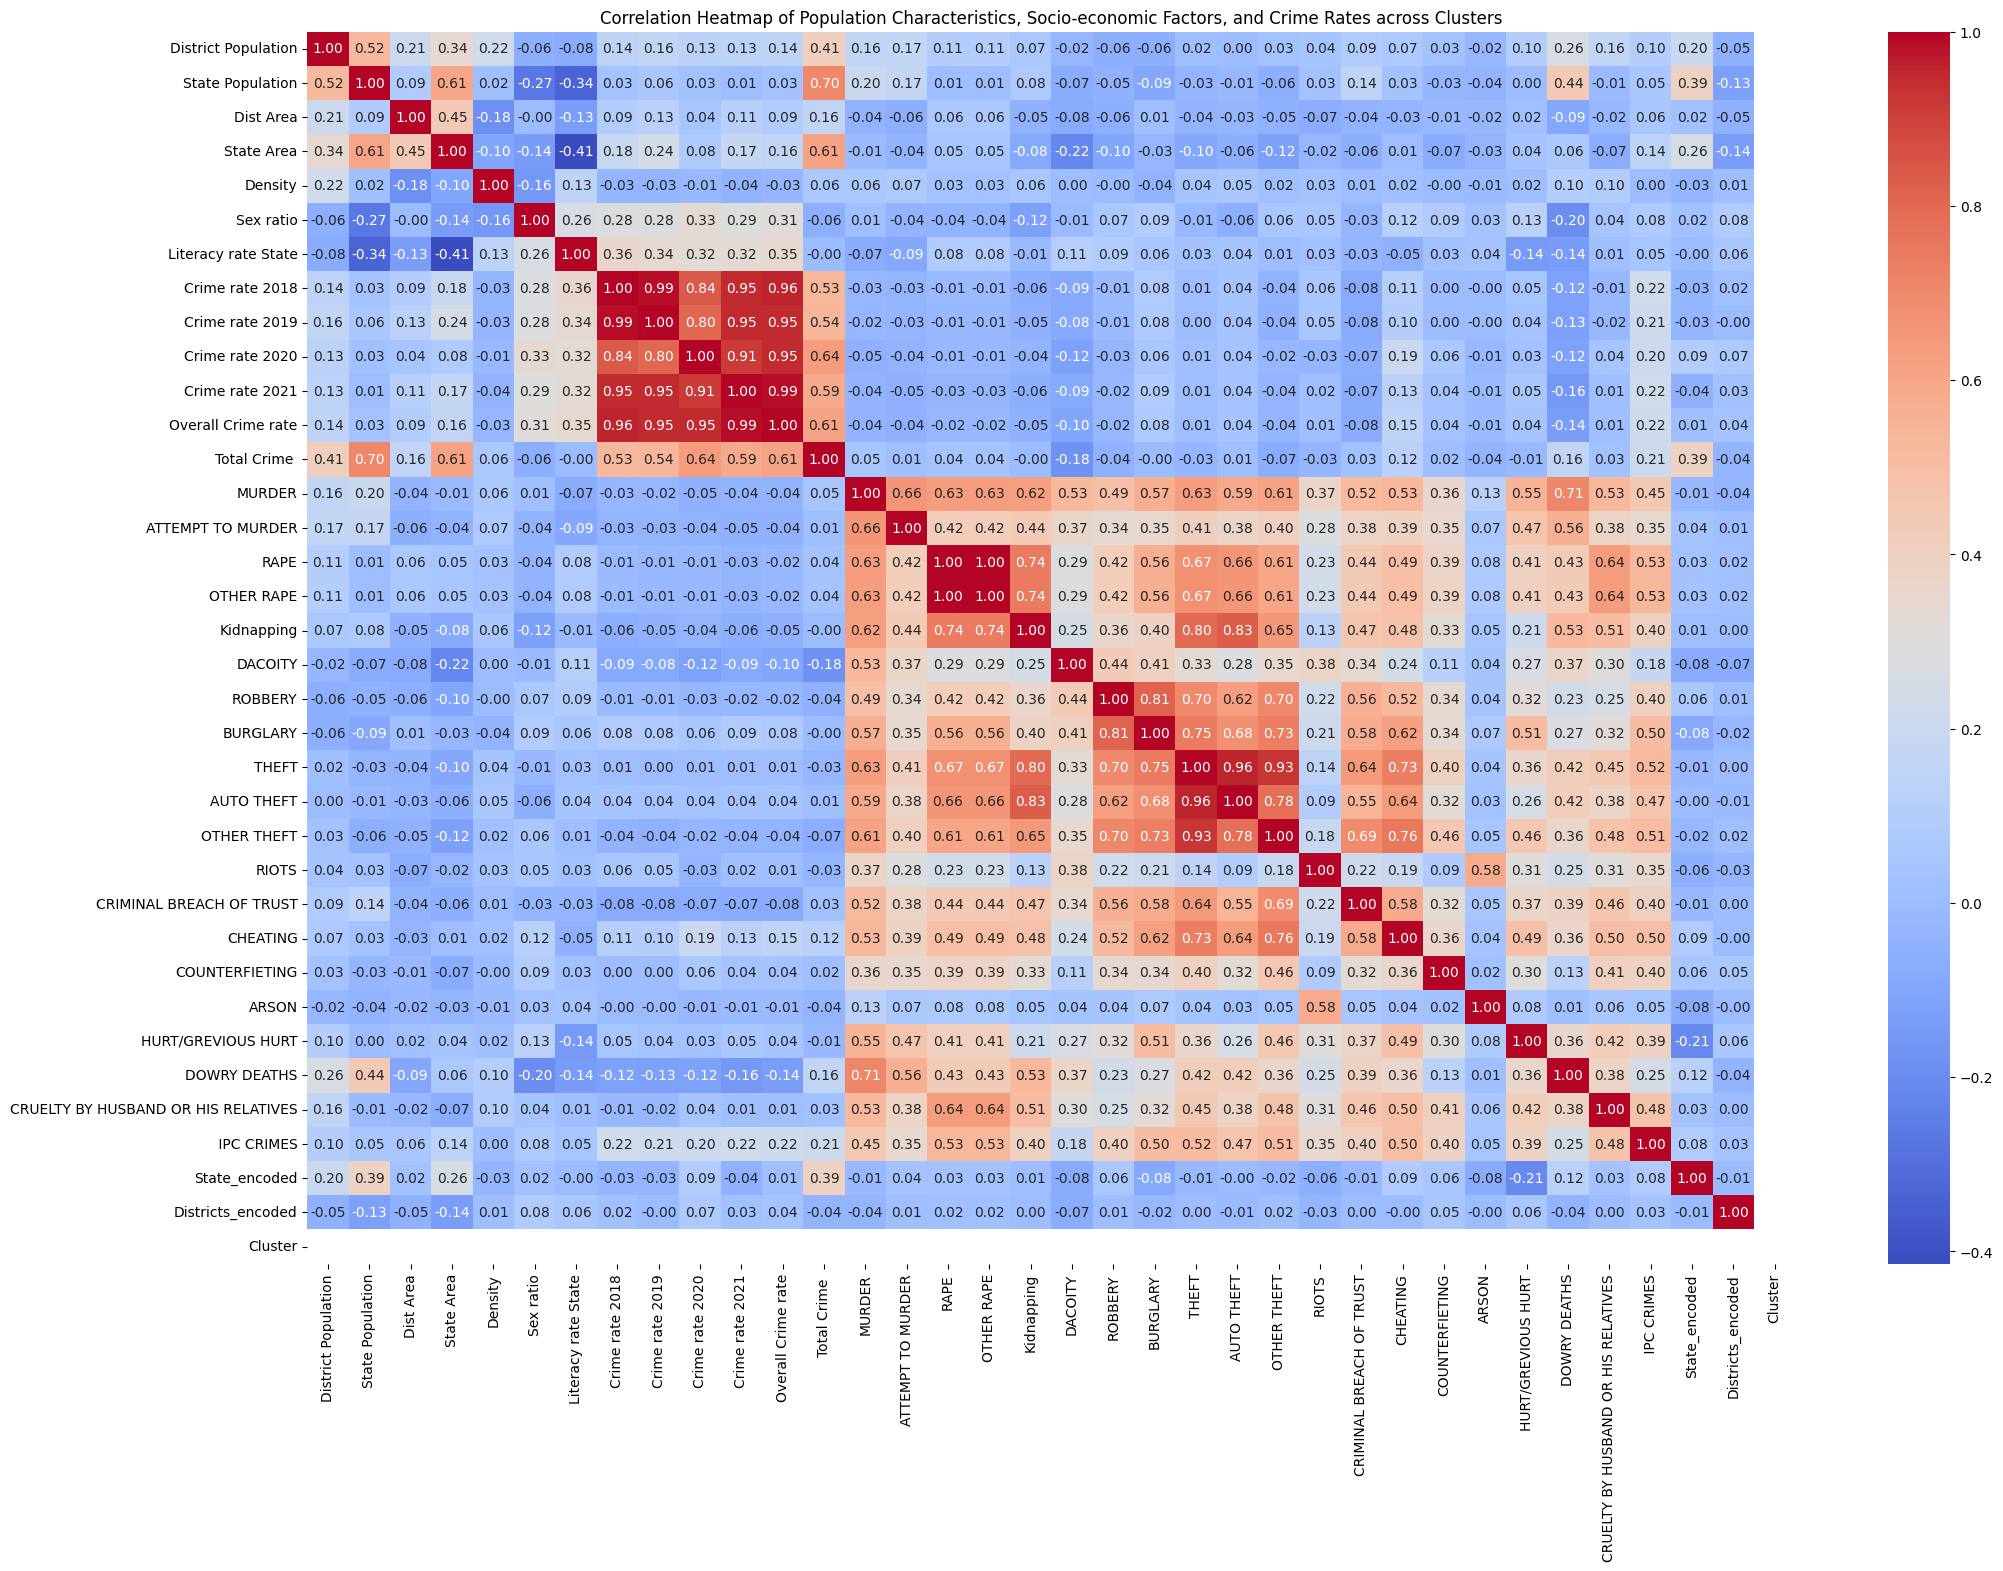

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace non-numeric values with NaN
df_concat_numeric = df_concat.apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
correlation_matrix = df_concat_numeric.corr()

# Plot heatmap
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Population Characteristics, Socio-economic Factors, and Crime Rates across Clusters')
plt.show()


# Report
### Cluster: Sensitive Area's

- Total Crime: The average total crime in sensitive areas is approximately 471,554, with a standard deviation of 400,831. This indicates that sensitive areas have a moderate to high level of crime.
- State_encoded:
 The average state encoding for sensitive areas is around 27.76, with a standard deviation of 4.12. This suggests that sensitive areas are distributed across different states.
- Districts_encoded: The average district encoding for sensitive areas is about 399.11, with a standard deviation of 217.82. This indicates that sensitive areas are spread across various districts.
### Cluster: Moderate Area's
- Total Crime: The average total crime in moderate areas is approximately 410,224, with a standard deviation of 286,644. Moderate areas tend to have a lower total crime compared to sensitive areas.
- State_encoded: The average state encoding for moderate areas is around 7.39, with a standard deviation of 5.07. This suggests that moderate areas are primarily concentrated in fewer states compared to sensitive areas.
- Districts_encoded: The average district encoding for moderate areas is about 386.93, with a standard deviation of 225.31. This indicates a moderate spread of moderate areas across districts.
### Cluster: Peaceful Area's
- Total Crime: The average total crime in peaceful areas is significantly higher, approximately 2,266,743, compared to sensitive and moderate areas. This suggests that peaceful areas have the lowest crime rate among the three clusters.
- State_encoded: The average state encoding for peaceful areas is around 23.64, with a standard deviation of 8.18. This indicates that peaceful areas are distributed across different states but tend to be more concentrated in certain states.
- Districts_encoded: The average district encoding for peaceful areas is about 382.59, with a standard deviation of 235.47. This suggests that peaceful areas are spread across various districts similar to sensitive areas.
## Observations and Recommendations:
- Crime Rates: Sensitive areas have moderate to high crime rates, while peaceful areas have significantly lower crime rates. Understanding the factors contributing to crime discrepancies among these areas is crucial for targeted interventions.
- Geographical Distribution: Sensitive areas are spread across different states and districts, indicating a widespread issue. Moderate and peaceful areas also show variability in their distribution but to a lesser extent.
- Policy Implications: Policies and interventions should be tailored based on the specific characteristics of each cluster. Sensitive areas might require targeted law enforcement efforts, socio-economic development programs, and community engagement initiatives to address underlying issues contributing to crime. Moderate areas might benefit from crime prevention strategies and community policing programs. Peaceful areas could focus on maintaining current safety levels and addressing potential emerging threats.

 # Capstone project overall story

 Crime Patterns in India

 ### Introduction:
Crime is a complex term that affects societies worldwide, and India is no exception. As a diverse and populous country, India grapples with various forms of criminal activities, ranging from petty theft to more serious offenses like murder and organized crime. Understanding the dynamics of crime is crucial for policymakers, law enforcement agencies, and society as a whole to formulate effective strategies for prevention and intervention. In this capstone project, we embark on a journey to explore and analyze crime patterns in India, delving into factors such as **Literacy Rate in each state, The population of each state, Area of each state and  other data that helps analysis **, and trends of criminal activities.


**Phase 1: Data Collection and Preparation:**

Our journey begins with the collection and preparation of relevant data. We gather information on the population, literacy rates, and area of each state of India from authoritative sources such as the Census of India and reputable websites and wikipedia. This data serves as the foundation for our subsequent analysis, providing context and insight into the socio-economic landscape of different regions across the country.


**Phase 2: State/UT Wise Analysis:**

In this phase, we conduct a comprehensive analysis of crime trends at the state and union territory level. We explore the relationship between literacy rates and total crimes, examining whether regions with higher literacy rates exhibit lower crime rates. Additionally, we delve into the types of crimes prevalent in each state and their correlation with literacy levels, population density, and geographical factors. We also analyze year-on-year variations in total crime rates, seeking to identify patterns and trends that may inform future policy decisions. Furthermore, we investigate the impact of area and population on overall crime rates, uncovering potential insights into the spatial distribution of criminal activities across India. Finally, we present detailed crime reports for each state, highlighting key findings and trends observed in our analysis.


**Phase 3: SQL Operations:**


 This phase, we leverage SQL queries to perform in-depth analysis on specific aspects of crime data. We create separate tables for different crime datasets and execute queries to identify significant trends and patterns. For instance, we identify states, districts, and years with the highest and lowest occurrences of specific crimes, such as rapes and kidnappings. We also examine the distribution of other major crimes, such as dacoity/robbery and murder, across different districts and states. Additionally, we extract valuable insights, such as the districts with consistently high murder rates over multiple years, using SQL queries and data manipulation techniques.


 **Phase 4: Unsupervised ML (Clustering):**


In the final phase of our analysis, we apply unsupervised machine learning techniques to identify clusters of districts based on their crime profiles. By merging relevant datasets and selecting appropriate features, we create three distinct clusters: Sensitive Areas, Moderate Areas, and Peaceful Areas. We then analyze each cluster to identify factors contributing to crime prevalence and propose actionable recommendations for crime prevention and intervention. Our analysis sheds light on the underlying socio-economic and demographic factors driving crime patterns in different regions of India, providing valuable insights for policymakers and law enforcement agencies.


## Conclusion:
In conclusion, our capstone project offers a comprehensive analysis of crime patterns in India, leveraging a multi-faceted approach that combines data collection, statistical analysis, SQL operations, and machine learning techniques. By examining the relationship between various socio-economic factors and crime rates, we uncover valuable insights that can inform evidence-based policy decisions and interventions aimed at reducing crime and enhancing public safety. Our findings underscore the importance of holistic approaches to crime prevention, addressing underlying social inequalities, and fostering community engagement to create safer and more resilient communities across India.